
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

**Neuron:**
- The "units entered for each layer within the neural network. Each neuron takes a group of weights and uses those weights to get a weighted sum of the inputs plus the bias. Then runs that value through an activation function and returns an output between 0 and 1 depending on the activation function used.

**Input Layer:**
- The initial data for training the neural network gets passed into this layer. This layer is assigned a random weight to start the process of updating the weights since it has no other initial weight to update.

**Hidden Layer:**
- There can be multiple hidden layers within a neural network. These layers are where the calulations are done and where the weights continue to get updated based on the prior layer. All of these layers wull be inbetween the input and output layers.

**Output Layer:**
- This is always the final layer in the neural network. This is the layer that will produce the results for the given inputs.

**Activation:**
- A function that works like a filter. It will take a group of weights for the input data and "filter" the data based on the weight average from the prior neurons to pull out and keep only the useful information that is best for making the prediction.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

- Back propagation takes a group of numbers and uses those numbers to predict, or tell what something might or might not be, the answer to a problem or question, using the data or information we already have available to us. This is a popular way to train a neural network because of the way it works to return an accurate prediction is a short amount of time. The way that is works is that it first runs through all the layers in the network, kind of like going through the layers of an onion, one at time. Then it will go backwards through the network while adjusting the parameters (weights and biases) based on the new information it learned when it peeled the onion the first time, kind of like putting the layers back on the onion with glue to strength the layers. 

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

- A simple one layer perceptron is used for a simple classification problem where a linear descision with be a good enough result. Being that there is only one layer it can only learn linearly with the help of gradient descent to find the minimal convergence point.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

# Look at the shape of data I am using
X.shape, y.shape

((300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. 

You model should have `1 dense layer` with a `single neuron` and a `sigmoid activation function`. 


Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [2]:
#import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

# Instantiate my simple perceptron
model1 = Sequential([Dense(1, input_dim=2, activation='relu')])

# Look at the summary of my simple perceptron
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Compile my simple perceptron
model1.compile(loss='binary_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

# Fit my simple perceptron on X and y with 
#   only 9 epochs and validate on 10% of the data
h1 = model1.fit(X, y, epochs=9, validation_split=0.1)

# Get the scores for my simple perceptron
score1 = model1.evaluate(X, y)

# Print my scores
print(f'Accuracy Score: {(score1[1] * 100):.2f}%')

Epoch 1/9
9/9 [==============================] - 1s 56ms/step - loss: 4.5702 - accuracy: 0.4854 - val_loss: 8.1974 - val_accuracy: 0.4667
Epoch 2/9
9/9 [==============================] - 0s 6ms/step - loss: 8.7878 - accuracy: 0.4147 - val_loss: 8.1974 - val_accuracy: 0.4667
Epoch 3/9
9/9 [==============================] - 0s 7ms/step - loss: 8.2542 - accuracy: 0.4571 - val_loss: 8.1974 - val_accuracy: 0.4667
Epoch 4/9
9/9 [==============================] - 0s 6ms/step - loss: 8.3057 - accuracy: 0.4453 - val_loss: 8.1974 - val_accuracy: 0.4667
Epoch 5/9
9/9 [==============================] - 0s 6ms/step - loss: 8.9238 - accuracy: 0.4120 - val_loss: 8.1974 - val_accuracy: 0.4667
Epoch 6/9
9/9 [==============================] - 0s 6ms/step - loss: 8.6428 - accuracy: 0.4343 - val_loss: 8.1974 - val_accuracy: 0.4667
Epoch 7/9
9/9 [==============================] - 0s 6ms/step - loss: 9.1343 - accuracy: 0.3966 - val_loss: 8.1974 - val_accuracy: 0.4667
Epoch 8/9
9/9 [=========================

In [4]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [5]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- `2` Hidden Layers
- `5-32` Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [6]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [7]:
# build and fit model

# Instantiate my multi-layer perceptron with 2 hidden layers, with 32 or less neurons
model2 = Sequential([
            Dense(32, input_dim=2, activation='relu'),
            Dense(24, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
])

# Compile my multi-layer perceptron
model2.compile(loss='binary_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

# Look at the summary of my multi-layer perceptron
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,305
Trainable params: 1,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Look at the config of my model to find out why it is failing 
#   the visable test below when it should not be failing.
model2.get_config()

############### POTENTIAL BUG IN TEST ############### PLEASE READ ###############
# According to the results here, for some reason there is an additional 
#   "hidden" input layer prior to my input layer which is throwing the indexing
#   off by 1 for the test. I changed the test to compensate for this but I am 
#   not sure how this is going to affect the hidden test when I run my sprint 
#   challenge through the autograder. If this part fails the hidden test because
#   of this bug, please correct this error for me.

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'name': 'dense_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 2),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'trainable': True,
    'units': 32,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer':

In [9]:
# Fit my multi-layer perceptron
h2 = model2.fit(X, y, 
                epochs=100,
                validation_split=0.1,
                callbacks=[myCallback()])

# Get the scores for my simple perceptron
score1 = model1.evaluate(X, y)

# Print my scores
print(f'Accuracy Score: {(score1[1] * 100):.2f}%')

Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 0.7395 - accuracy: 0.4486 - val_loss: 0.6770 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7254 - accuracy: 0.4551 - val_loss: 0.6734 - val_accuracy: 0.5333
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7160 - accuracy: 0.4921 - val_loss: 0.6704 - val_accuracy: 0.5333
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7062 - accuracy: 0.4826 - val_loss: 0.6678 - val_accuracy: 0.5667
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.5587 - val_loss: 0.6655 - val_accuracy: 0.6667
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5947 - val_loss: 0.6633 - val_accuracy: 0.6667
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6811 - accuracy: 0.5642 - val_loss: 0.6609 - val_accuracy: 0.7333
Epoch 8/100
9/9 [=========

In [10]:
# Visible test
assert len(model2.get_config()["layers"]) == 5, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][3]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


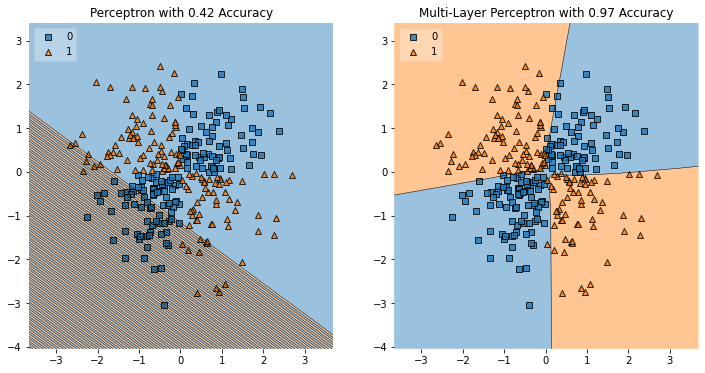

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

- Why does the Perceptron (model1) only achieve ~70% accuracy?  
    - It is a binary classification and only has one layer meaning that it can only learn a linear decision. Therefore the model is not able to train the model to accurately predict the outcome any better then just guessing. This is a very "vanilla" model with only one reduction to the noise within the data.

- What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y?
    - The multiple hidden layers give this model the ability to learn the training data better because it is going through multiple "filters" to remove the noise from the data that is not useful in helping to predict the outcome of the values. Therefore this is a much better model when you need it to learn non-linear relationships.

- Why might this property be useful in more complex data such as images?
    - The multi-layer perceptron will be able to get rid of the noise within the image that is not useful and just pull out the data that makes the training image unique in comparison to the other images within the dataset.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyperparameter tune two parameters each with no more than 3 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. 
    - **Use `n_jobs` = 1**
- When hyperparameter tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1


In [13]:
# Create an input matrix named 'X' store it in a 2D numpy array
X = df.drop(columns='target')

# Create an output vector for the labels named 'Y', store it in 1D numpy array
Y = df['target']

# Look at the shape of X and Y
X.shape, Y.shape

######### NOTE TO DESIGNER OF THESE TEST #########
# Y should actually be named y to follow naming conventions that I have been 
#   taught through multiple instructors here at Lambda. The features should be
#   capitalized but the target should be lowercase. At least this is what I 
#   have learned here at Lambda.

((303, 13), (303,))

In [14]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [15]:
# Imports to add GridSearch and the classifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [16]:
# Create a function named 'create_model' that returns a complied keras model - required for KerasClassifier

from tensorflow.keras.optimizers import SGD

# Function to create a baseline model
def create_model(input_dim=13, layers=1, units=32, lr=0.01):
    # Instantiate a keras model
    model = Sequential()

    # Add the input layer
    model.add(Dense(units=units, input_dim=input_dim, activation='relu'))

    # Add hidden layer(s)
    for i in range(layers):
        model.add(Dense(units=(units / 2), activation='relu'))
        units = (units / 2)

    # Add the output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    opt = SGD(learning_rate=lr)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    # Return the model
    return model

In [17]:
type(create_model())

tensorflow.python.keras.engine.sequential.Sequential

In [18]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [19]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
model = KerasClassifier(build_fn=create_model, verbose=1)

In [20]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [21]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with no more than 3 possible values for each 

# Define my search parameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 50, 90]
}

In [22]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [23]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = gs.fit(X, Y)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 18.7893 - accuracy: 0.5503
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.4824
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.4954
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5382
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5403
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.5245
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.5675
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5589
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5654
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6650 - accuracy: 0.5246
Epoch 1/10
8/8 [======================

In [24]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6368852376937866 using {'batch_size': 32, 'epochs': 90}
Means: 0.5314207553863526, Stdev: 0.0451658512841708 with: {'batch_size': 32, 'epochs': 10}
Means: 0.5942076563835144, Stdev: 0.0637146287396847 with: {'batch_size': 32, 'epochs': 50}
Means: 0.6368852376937866, Stdev: 0.06034133102305014 with: {'batch_size': 32, 'epochs': 90}
Means: 0.5874863386154174, Stdev: 0.017247697294622936 with: {'batch_size': 64, 'epochs': 10}
Means: 0.6068852424621582, Stdev: 0.06343656869720858 with: {'batch_size': 64, 'epochs': 50}
Means: 0.5942076444625854, Stdev: 0.09818098450373483 with: {'batch_size': 64, 'epochs': 90}


In [26]:
# Define my new search parameters
param_grid = {
    'batch_size': [16, 64],
    'epochs': [36, 63]
}

# Run Grid Search 
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = gs.fit(X, Y)

Epoch 1/36
16/16 [==============================] - 0s 1ms/step - loss: 49.4806 - accuracy: 0.4965
Epoch 2/36
16/16 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.4458
Epoch 3/36
16/16 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.4924
Epoch 4/36
16/16 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4973
Epoch 5/36
16/16 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4862
Epoch 6/36
16/16 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5179
Epoch 7/36
16/16 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5626
Epoch 8/36
16/16 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5919
Epoch 9/36
16/16 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5943
Epoch 10/36
16/16 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5988
Epoch 11/36
16/16 

In [27]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.610765016078949 using {'batch_size': 64, 'epochs': 36}
Means: 0.5774863302707672, Stdev: 0.063963275292073 with: {'batch_size': 16, 'epochs': 36}
Means: 0.5217486321926117, Stdev: 0.06599265499776052 with: {'batch_size': 16, 'epochs': 63}
Means: 0.610765016078949, Stdev: 0.027782785945669634 with: {'batch_size': 64, 'epochs': 36}
Means: 0.5643715858459473, Stdev: 0.05898542795537737 with: {'batch_size': 64, 'epochs': 63}


In [28]:
# Define my new search parameters
param_grid = {
    'batch_size': [16, 64],
    'epochs': [33]
}

# Run Grid Search 
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = gs.fit(X, Y)

Epoch 1/33
16/16 [==============================] - 0s 1ms/step - loss: 80.0527 - accuracy: 0.4818
Epoch 2/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.6016
Epoch 3/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5454
Epoch 4/33
16/16 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5703
Epoch 5/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4896
Epoch 6/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 7/33
16/16 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5887
Epoch 8/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5096
Epoch 9/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5693
Epoch 10/33
16/16 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5122
Epoch 11/33
16/16 

In [29]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6273770570755005 using {'batch_size': 64, 'epochs': 33}
Means: 0.5578688383102417, Stdev: 0.0512271098463448 with: {'batch_size': 16, 'epochs': 33}
Means: 0.6273770570755005, Stdev: 0.08590964292682834 with: {'batch_size': 64, 'epochs': 33}


In [30]:
# Define my new search parameters
param_grid = {
    'batch_size': [16, 32],
    'epochs': [33, 63]
}

# Run Grid Search 
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = gs.fit(X, Y)

Epoch 1/33
16/16 [==============================] - 0s 1ms/step - loss: 31.3385 - accuracy: 0.5098
Epoch 2/33
16/16 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4724
Epoch 3/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4799
Epoch 4/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4940
Epoch 5/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5420
Epoch 6/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5202
Epoch 7/33
16/16 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4710
Epoch 8/33
16/16 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5105
Epoch 9/33
16/16 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5777
Epoch 10/33
16/16 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5071
Epoch 11/33
16/16 

In [31]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.5875409841537476 using {'batch_size': 32, 'epochs': 63}
Means: 0.5113661110401153, Stdev: 0.0990179321183282 with: {'batch_size': 16, 'epochs': 33}
Means: 0.544590163230896, Stdev: 0.04661634680777779 with: {'batch_size': 16, 'epochs': 63}
Means: 0.5840983510017395, Stdev: 0.06891107794103736 with: {'batch_size': 32, 'epochs': 33}
Means: 0.5875409841537476, Stdev: 0.07649290211206625 with: {'batch_size': 32, 'epochs': 63}


In [34]:
# Define my new search parameters
param_grid = {
    'batch_size': [32, 48, 64],
    'epochs': [7, 39, 45]
}

# Run Grid Search 
gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = gs.fit(X, Y)

Epoch 1/7
8/8 [==============================] - 0s 2ms/step - loss: 24.2014 - accuracy: 0.5015
Epoch 2/7
8/8 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4829
Epoch 3/7
8/8 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5855
Epoch 4/7
8/8 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6345
Epoch 5/7
8/8 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5566
Epoch 6/7
8/8 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6344
Epoch 7/7
2/2 [==============================] - 0s 4ms/step - loss: 0.6317 - accuracy: 0.6393
Epoch 1/7
8/8 [==============================] - 0s 2ms/step - loss: 30.8664 - accuracy: 0.4908
Epoch 2/7
8/8 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5570
Epoch 3/7
8/8 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5696
Epoch 4/7
8/8 [==============================] -

In [35]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.6301639318466187 using {'batch_size': 64, 'epochs': 45}
Means: 0.5977595567703247, Stdev: 0.08045497950983599 with: {'batch_size': 32, 'epochs': 7}
Means: 0.5645355224609375, Stdev: 0.05508197498699996 with: {'batch_size': 32, 'epochs': 39}
Means: 0.6205464363098144, Stdev: 0.042306316281750085 with: {'batch_size': 32, 'epochs': 45}
Means: 0.5508196711540222, Stdev: 0.06465567933546881 with: {'batch_size': 48, 'epochs': 7}
Means: 0.5446447968482971, Stdev: 0.05074605804559433 with: {'batch_size': 48, 'epochs': 39}
Means: 0.5609836101531982, Stdev: 0.06484439531573678 with: {'batch_size': 48, 'epochs': 45}
Means: 0.5708196818828583, Stdev: 0.0703621486263459 with: {'batch_size': 64, 'epochs': 7}
Means: 0.590546441078186, Stdev: 0.06065909327171317 with: {'batch_size': 64, 'epochs': 39}
Means: 0.6301639318466187, Stdev: 0.05939431095283233 with: {'batch_size': 64, 'epochs': 45}
